Import Libraries

In [72]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [73]:
url="https://www.remotepython.com/jobs/"
response = requests.get(url)

In [74]:
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [75]:
# Extracting job titles
job_titles = [title.text.strip() for title in soup.find_all('h4')]

In [76]:
# Preprocessing
# Tokenization and Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_job_titles)

In [77]:
# Convert sparse matrix to a dense array
data_matrix = X.toarray()

In [78]:
# Perform hierarchical clustering
Z = hierarchy.linkage(data_matrix, method='ward')

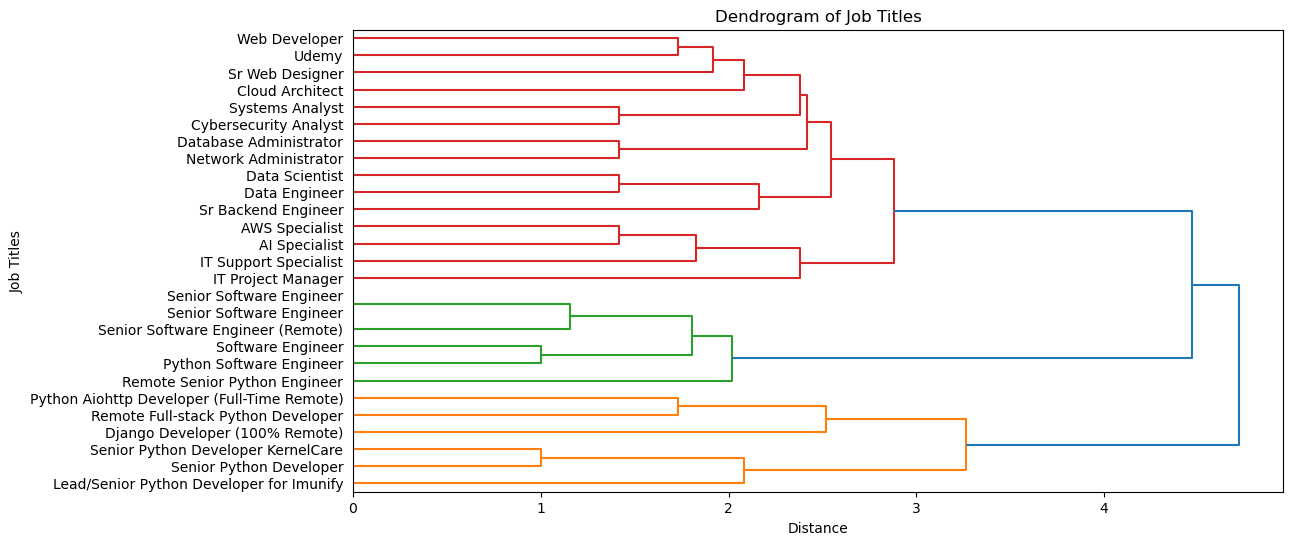

In [79]:
# Plot the dendrogram
plt.figure(figsize=(12, 6)) # Adjust figsize for better visualization
dn = hierarchy.dendrogram(Z, labels=all_job_titles, orientation='right')
plt.title('Dendrogram of Job Titles')
plt.xlabel('Distance')
plt.ylabel('Job Titles')
plt.show()